<a href="https://colab.research.google.com/github/CarlosOX/SemanaTec/blob/main/07_2_actividad_visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Estadística básica

* **Nombre:** Carlos Eduardo Ortega Clement 
* **Matrícula:** A01707480

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [7]:
# Carga las librerías necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

In [5]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.



uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  

df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

Saving bestsellers with categories.csv to bestsellers with categories (1).csv
User uploaded file "bestsellers with categories.csv" with length 51161 bytes


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

In [6]:
# Crea una tabla resumen con los estadísticas generales de las variables
# numéricas.

df_numericV=df[['User Rating','Reviews','Price','Year']]
df_numericV.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


Text(0, 0.5, 'Frecuencia')

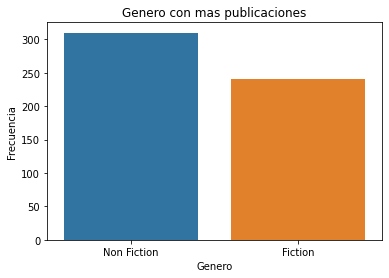

In [10]:
## ¿Cuál es el género con más publicaciones? Muéstralo en un gráfico.

fig = plt.figure(figsize=(6,4))


sns.countplot(data=df, x = 'Genre')


plt.title('Genero con mas publicaciones')
plt.xlabel('Genero')
plt.ylabel('Frecuencia')

Genre  Fiction  Non Fiction
Year                       
2009        24           26
2010        20           30
2011        21           29
2012        21           29
2013        24           26
2014        29           21
2015        17           33
2016        19           31
2017        24           26
2018        21           29
2019        20           30


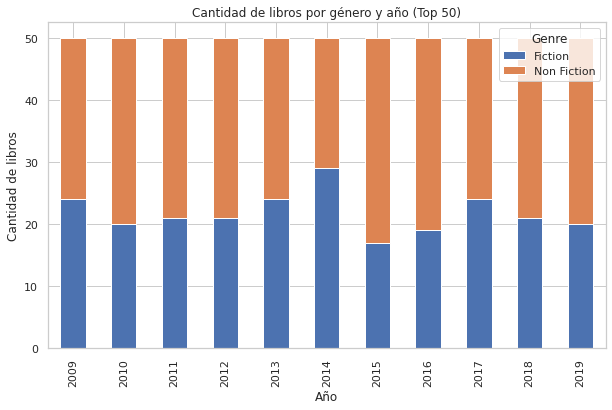

In [35]:
# ¿Cuántos libros del top 50 se publicaron por género en cada año? ¿Hay algún 
# año donde hubo más libros de ficción en el top 50?. Muéstralo en un gráfico.

table = pd.pivot_table(df, index="Year", columns="Genre", values="Name", aggfunc="count")

print(table)

# Crear el gráfico
sns.set(style="whitegrid")
ax = table.plot(kind="bar", stacked=True, figsize=(10, 6))
ax.set_ylabel("Cantidad de libros")
ax.set_xlabel("Año")
plt.title("Cantidad de libros por género y año (Top 50)")
plt.show()


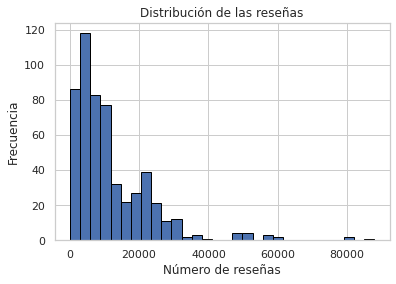

In [36]:
# ¿Cómo se distribuye la variable Review? Muéstra el histografa.

plt.hist(df["Reviews"], bins=30, edgecolor="black")
plt.xlabel("Número de reseñas")
plt.ylabel("Frecuencia")
plt.title("Distribución de las reseñas")
plt.show()

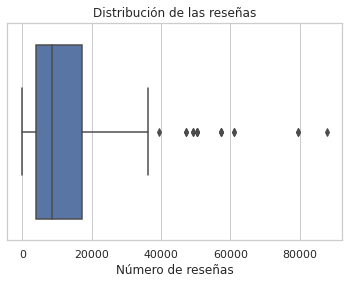

In [37]:
# Ahora muéstralo en un gráfico de caja y bigote.

sns.boxplot(x=df["Reviews"])
plt.xlabel("Número de reseñas")
plt.title("Distribución de las reseñas")
plt.show()

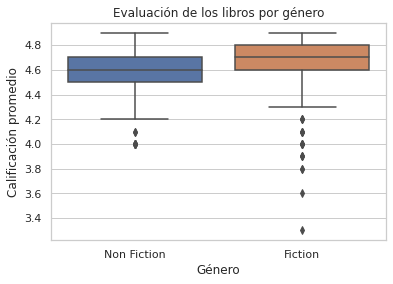

In [38]:
# ¿Cómo se compara la evaluación del libro por género? ¿Qué genero es mejor 
# evaluado por los lectores? Muéstralo en un solo gráfico de caja y bigote.

sns.boxplot(x=df["Genre"], y=df["User Rating"])
plt.xlabel("Género")
plt.ylabel("Calificación promedio")
plt.title("Evaluación de los libros por género")
plt.show()

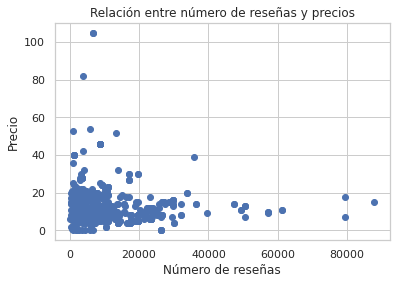

In [39]:
# ¿Cuál es la relación entre el número de reseñas y precios? Muéstralo en un
# gráfico de dispersión.

plt.scatter(x=df["Reviews"], y=df["Price"])
plt.xlabel("Número de reseñas")
plt.ylabel("Precio")
plt.title("Relación entre número de reseñas y precios")
plt.show()

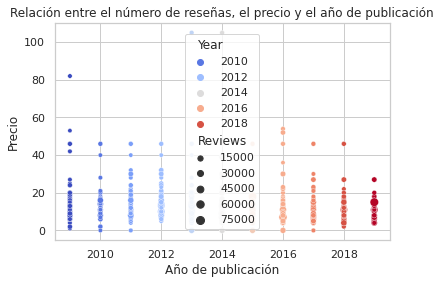

In [40]:
# De la pregunta anterior, ¿influye algo el año de publicación? ¿Cuál es la
# relación entre el número de reseñar, el precio y el año de publicación?
# IMPORTANTE: Selecciona una paleta de colores adeacuada.

# Crear un gráfico de dispersión con el número de reseñas, el precio y el año de publicación
sns.scatterplot(x=df["Year"], y=df["Price"], size=df["Reviews"], hue=df["Year"], palette="coolwarm")
plt.xlabel("Año de publicación")
plt.ylabel("Precio")
plt.title("Relación entre el número de reseñas, el precio y el año de publicación")
plt.show()

Podemos observar que los libros más caros casi no tienen reseñas y el año de publicación no afecta mucho ya que el comportamiento es parecido en todos los años


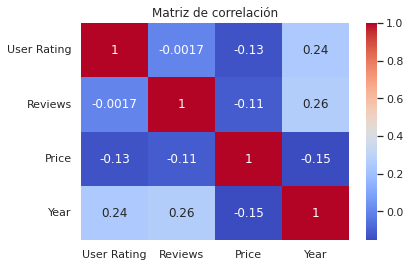

In [41]:
# ¿Cuál es la correlación entre las variables numéricas? Muéstralo en un 
# gráfico. La variable año, a pesar de ser numérica, la vamos a considerar como
# cualitativa, así que la eliminaremos del análisis.

df_num = df.select_dtypes(include='number')
corr_matrix = df_num.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

¿Cuáles variables tiene una fuerte relación positiva entre sí y cuáles tienen una fuerte relación negativa? (Esta pregunta no es de código) Responde la pregunta en la siguiente celda de texto.

** Escribe tu respuesta ** :  Ninguna positiva tiene una relación muy fuerte ya que todas están en azul claro por lo que están lejanas a 1. Y las que tienen relacion negativa tampoco hay una fuerte. Sin embargo las que mejor relación tienen tanto positiva como negativa son: año-reviews(positiva) y año-precio(negativa)

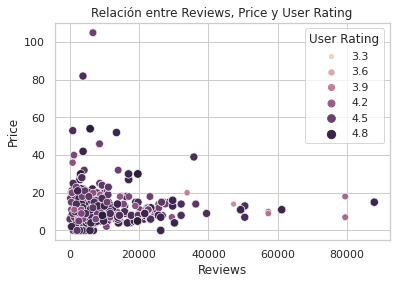

In [42]:
# Haz una gráfica donde podemos comparar la relación entre las tres variables 
# numéricas (User Rating, Reviews y Price) y que, además, podamos ver el efecto
# del libro. La variable año, a pesar de ser numérica, la vamos a considerar como
# cualitativa, así que la eliminaremos del análisis.

sns.scatterplot(x='Reviews', y='Price', hue='User Rating', size='User Rating', data=df)
plt.title('Relación entre Reviews, Price y User Rating')
plt.xlabel('Reviews')
plt.ylabel('Price')
plt.show()
